In [1]:
%%capture
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [3]:
root_df = pd.read_excel('COVID_date_data_for_figure.xlsx')

In [4]:
root_df.sample(6)

,Grp,Sub,Srvy,Time,Qual,QDay,TLFB,TDay
1190,74,2451,0,Pre1,2019-11-20 15:55:52,-116.0,2019-11-19 00:00:00,-118.0
1018,62,2394,4,Pst3,2021-08-10 07:41:44,512.0,2021-08-17 00:00:00,519.0
1128,70,2419,3,Pst3,2021-05-11 10:54:53,421.0,2021-05-11 00:00:00,421.0
1246,78,2478,1,Pst1,2020-08-24 01:00:36,161.0,2020-08-27 00:00:00,164.0
243,16,2113,1,Pre2,2018-12-17 11:21:34,-454.0,2018-12-17 00:00:00,-455.0
129,8,2039,0,Pre4,2018-03-19 17:18:55,-727.0,2018-03-18 00:00:00,-729.0


In [5]:
# 'Pre5':5, 
# , 'Pst5':10
priority_dict = {'Pre4':4, 'Pre3':3, 'Pre2':2, 'Pre1':1, 'Pst1':6, 'Pst2':7, 'Pst3':8, 'Pst4':9}
def custom_sort_key(item):
    # return priority_dict[item]
    if item.startswith('Pre'):
        return ('Pre', -int(item[3:]))
    elif item.startswith('Pst'):
        return ('Pst', int(item[3:]))
    else:
        return item

In [6]:
#stay-at-home order and limited bar space
stay_at_home_start = date(2020,3,21)
stay_at_home_end = date(2020,5,29)
stay_at_home_duration = stay_at_home_end - stay_at_home_start

limited_bar_end = date(2021,6,11)
limited_bar_duration = limited_bar_end - stay_at_home_end

/var/folders/35/8nzwnddx74qg4p54k0q2v_0r0000gn/T/ipykernel_50468/3953258326.py:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


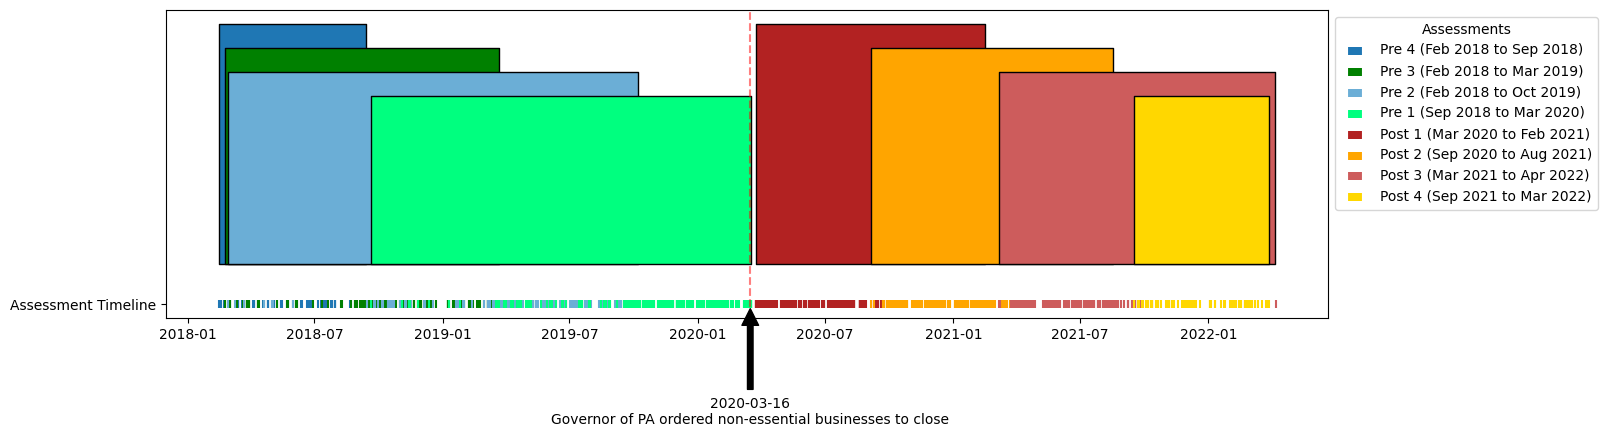

In [7]:
df = root_df.copy() 
df = df[(df['Qual']!='#NULL!')].reset_index(drop=True)
df = df[(~df['Time'].isin(['Pst5','Pre5']))].reset_index(drop=True)

# Apply the custom sorting function to the 'Group' column
df['Sorting_Key'] = df['Time'].apply(custom_sort_key)
# Sort the DataFrame based on the sorting key
df = df.sort_values(by='Sorting_Key').drop('Sorting_Key', axis=1).reset_index(drop=True)

df['Qual'] = pd.to_datetime(df['Qual'])
df['y_pos'] = 0

group_col = 'Time'

# palette = ['Green', 'Gray', 'peachpuff', 'Yellow', 'skyBlue', 'beige', '#E3A9C4', 'Orange', 'indianred', 'mediumseagreen', 'White']
# palette = ['steelblue', 'deepskyblue', 'dodgerblue', 'lightskyblue', 'skyBlue', 'beige', '#E3A9C4', 'Orange', 'indianred', 'mediumseagreen', 'White']
# palette = ["#1f77b4", "#4d88d5", "#6baed6", "#9ecae1", "firebrick", "brown", "indianred", "lightcoral"]
# palette = ["#1f77b4", "darkviolet", "#9ecae1", "violet", "firebrick", "orange", "indianred", "gold"]
palette = ["#1f77b4", "green", "#6baed6", "springgreen", "firebrick", "orange", "indianred", "gold"]
# 
# "#4e79a7", "#f28e2b", "#e15759", "#76b7b2"
# "blue", "cornflowerblue", "lightskyblue", "deepskyblue"

handles = []
labels = []
marker_styles = ['|','|','|','|']
fig, ax = plt.subplots(figsize=(15,4))
x = 0
for group_num, group_val in enumerate(df[group_col].unique()):
    
    group_df = df[df[group_col] == group_val].reset_index(drop=True)
    
    group_start_date = group_df['Qual'].min()
    group_end_date = group_df['Qual'].max()
    group_duration = group_end_date - group_start_date
    
    if group_num%4 ==0:
        x = 0
    scatter = ax.scatter(group_df['Qual'], group_df['y_pos'], marker=marker_styles[group_num%4], color=palette[group_num])
    ax.broken_barh([(group_start_date, timedelta(days=group_duration.days))], (0.05, 0.3-x), facecolors=palette[group_num], edgecolor='black')
    x += .03
    
    handles.append(scatter)
    labels.append(f'{group_val.replace('Pre','Pre ').replace('Pst','Post ')} ({group_start_date.strftime("%b %Y")} to {group_end_date.strftime("%b %Y")})')

ax.axvline(x = date(2020, 3, 16), color = 'red', linestyle = '--', alpha = 0.5)

ax.annotate('2020-03-16\nGovernor of PA ordered non-essential businesses to close', 
            xy=(date(2020, 3, 16), 0), xytext=(date(2020, 3, 16),-0.15),
            color='black',
            horizontalalignment="center",
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks([0], ['Assessment Timeline']) 

legend = ax.legend(handles, labels, loc='upper left', title='Assessments')
legend.set_bbox_to_anchor((1, 1))

for handle in legend.legendHandles:
    handle.set_linewidth(10)
    
plt.savefig("figure1_overlap_scheme_2_c2.svg", format="svg", bbox_inches = 'tight', dpi=1800)
plt.show()

In [8]:
# df = root_df.copy() 

# df = df[df['Qual']!='#NULL!'].reset_index(drop=True)
# df['Qual'] = pd.to_datetime(df['Qual'])
# df['y_pos'] = 0

# group_col = 'Time'
# # palette = ['lightblue', 'mediumseagreen', 'lavender', 'lightgray', 'lightpink', 'peachpuff', 'antiquewhite', 'aqua', 'beige', 'lightseagreen']
# # palette = ['lightblue', 'lavender', '#B0C7B6', '#E3A9C4', '#BFB8A1', '#D3D2B2', '#A7B9D0', '#E4D2B9', '#C8DED0']
# palette = ['Red', 'Green', 'skyBlue', 'Yellow', 'Orange', 'beige', 'Pink', 'lightpink', 'Gray', 'mediumseagreen', 'White']

# sns.set(style="whitegrid")

# # Create the main Seaborn plot
# fig, ax = plt.subplots(figsize=(15, 2))

# # Plot stay-at-home and limited bar/restaurant capacity bars
# ax.bar(stay_at_home_start, 0.2, stay_at_home_duration, color='thistle', label='stay-at-home orders')
# ax.bar(stay_at_home_end, 0.2, limited_bar_duration, color='lavender', label='limited bar/restaurant capacities')

# # Plot the broken bars for each group
# for group_num, group_val in enumerate(df[group_col].unique()):
#     group_df = df[df[group_col] == group_val].reset_index(drop=True)
#     group_start_date = group_df['Qual'].min()
#     group_end_date = group_df['Qual'].max()
#     group_duration = group_end_date - group_start_date

#     ax.bar(group_start_date, 0.3, group_duration, color=palette[group_num])

# # Adding a vertical line and annotation
# ax.axvline(x=date(2020, 3, 13), color='red', linestyle='--', alpha=0.5)
# ax.annotate('2020-03-13 National Emergency declared by the U.S. President concerning the Novel Coronavirus Disease Outbreak',
#              xy=(date(2020, 3, 13), 0), xytext=(date(2020, 3, 13), -0.6),
#              color='black',
#              horizontalalignment="center",
#              arrowprops=dict(facecolor='black', shrink=0.05))

# # Adding labels and title
# ax.text(stay_at_home_start, 0.4, 'stay-at-home\norders', size=8, style='oblique')
# ax.text(stay_at_home_end, 0.5, 'limited bar/restaurant capacities', style='oblique')

# # Setting y-axis labels
# ax.set_yticks([0.2, 0.5])
# ax.set_yticklabels(['Distribution of Dates', 'Major COVID-related Policies\nin Illinois'])

# # Adding a legend for the policies
# ax.legend(loc='upper left')

# plt.show()
